In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import math as math
from scipy.misc import comb

Question 1 : For Chebyshev interpolation, the function * takes its maxima at x=+1, x=-1, so in order to compute the Lebesgue constant ||L||, we only need to evaluate the Lagrange coefficients phi;nk. Plotting the graph (of a function) of ||Ln|| against n, experimentally determine the constant C in the assumed dependence ||Ln||=Clog(n).

In [7]:
def Chebyshev(nn):
    #finds coordinates of Chebishev nodes for nn - number of nodes
    nodelist =[float(0.) for x in range (nn)] #initializing
    for i in range(nn):#print i#debug
        nodelist[i]=math.cos(math.pi*(2*(i+1)-1)/(2*nn))#print nodelist[i]#debug
    return nodelist

In [8]:
def Lagrange(nn, nodelist, x):
    #performs Lagrange interpolation on at a point x and for nn nodes
    somme=0 #initializing
    for i in range(nn): 
        prod=1 #initializing
        for j in range (nn): #compute Lagrange interpolation
            if j!=i :
                prod=prod*(x-nodelist[j])/(nodelist[i]-nodelist[j])
            else :
                prod=prod*1
        somme=somme+abs(prod)
    y=somme #assign f(x) to y
    return y

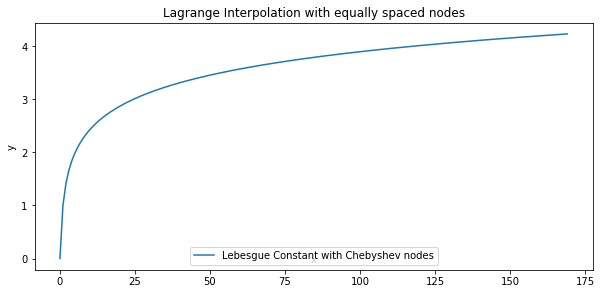

In [9]:
fig = plt.figure(figsize=(10,10)) #graph setup
ax1 = fig.add_subplot(211)

nn=170 # number of nodes
nlist = [x for x in range(nn)] #stores degrees 
Llist =[float(0.) for x in range (nn)] # stores LEbesgues constant for each degree of interpolation

for i in range (nn):#computing Ln for nn
    nodelist=Chebyshev(i) #gets i Chebyshev nodes between [-1;1]
    Llist[i]=max(Lagrange(i,nodelist,-1.),Lagrange(i,nodelist,1.))
    #print i #printing out exact values to compute C
    #print Llist[i]
ax1.plot(nlist,Llist,label='Lebesgue Constant with Chebyshev nodes')

plt.legend()                                                             #more graph setup - no math relevance
ax1.set_title(r'Lagrange Interpolation with equally spaced nodes')
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="lower center")
plt.show()

From that data we can guess C ~ 2/pi * log(n)